This homework was created by:

Galvin Hoang
Chiara Lesa
Anna Novikova

As this was created in google colab, some errors might arise depending on the distribution of python used when executing this code.

You can find and execute the original colab code by [clicking this hyperlink](https://colab.research.google.com/drive/1BLrY2DS_evuCO_l1rshayqQiLPRpgaap?usp=sharing)

# **Exercise sheet 1**

## Exercise 1:

Consider the following [Fashion-mnist-data
set](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles). Implement the learning task of classifying the 10 different image types according to the following table.


    0   T-shirt/top

    1   Trouser

    2   Pullover

    3   Dress

    4   Coat

    5   Sandal

    6   Shirt

    7   Sneaker

    8   Bag

    9   Ankle boot

You can use the MNIST implementation from the lecture.


In [16]:
## Loading packages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# load MNIST data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Image number 13610 is supposed to be: 1


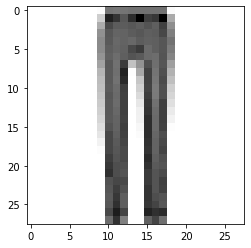

In [ ]:
def show(i):
    print('Image number',i,'is supposed to be:',y_train[i]) # The label of training data point is printed
    plt.imshow(x_train[i], cmap='Greys')
    plt.show()
image_index = np.random.randint(60000)  # You may select anything up to 60,000
show(image_index)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # 28 image columns and rows, 
# the last entry corresponds to the color chanels (1 for grey scale)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Normalizing the RGB (red green blue) codes by dividing it to the max RGB value.
# For the pixels there are usually 256 color values [0-255], normalization to [0,1]
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape) #shape property giv
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
y_train.shape

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


(60000,)

In [ ]:
## This imports layer types.
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
# Creating a Sequential Model and adding the layers
model = Sequential()

layer1=Conv2D(28, kernel_size=(3,3), input_shape=input_shape) # (3,3) for mnist
#Input to such a layer is a tensor(batch, rows, cols, channels)
#Output of such a layer is a tensor(batch, rows, cols, filters)
layer1.trainable=True
model.add(layer1) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) # Flattening the arrays for fully connected layers


layer2 = Dense(128, activation=tf.nn.relu,kernel_initializer='random_uniform')
#Output dimension is 128, activation function is relu, kernel initializer refers 
#to how the parameters of the matrix are initialized, 
layer2.trainable=True #False
model.add(layer2)

layer3 = Dense(2*128, activation=tf.nn.relu,kernel_initializer='random_uniform')
layer3.trainable=False
model.add(layer3)

In [ ]:
model.add(Dropout(0.2)) 
model.add(Dense(10,activation=tf.nn.softmax)) 
#10 is the output dimension, 
#softmax is applied to give the probability of the digits 1 to 10


## Model summary:
model.summary()



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Training happens now:
model.fit(x=x_train,y=y_train, epochs=1)

# Testing happens here:
x = model.evaluate(x_test, y_test)
print('Test result: [loss, accuracy]=',x)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

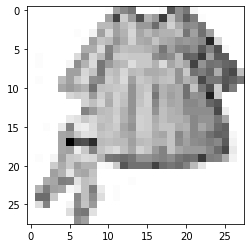

Prediction Bag
Grand Truth Dress


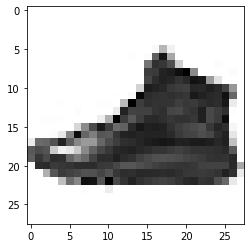

Prediction Sneaker
Grand Truth Ankle boot


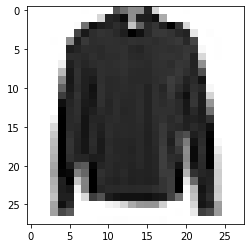

Prediction Coat
Grand Truth Shirt


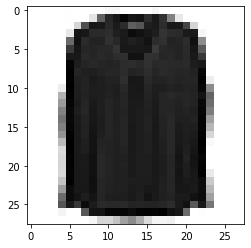

Prediction Pullover
Grand Truth Coat


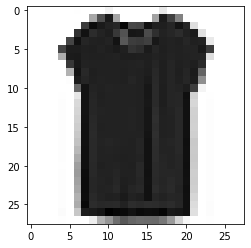

Prediction Shirt
Grand Truth T-shirt/top


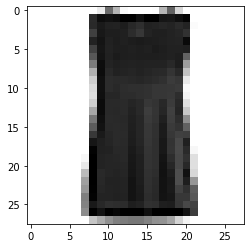

Prediction Dress
Grand Truth T-shirt/top


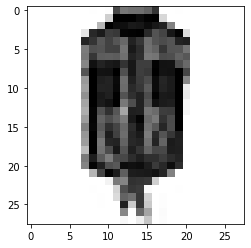

Prediction Coat
Grand Truth Shirt


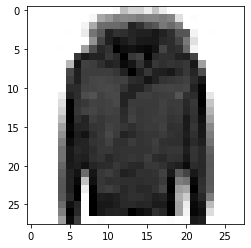

Prediction Pullover
Grand Truth Coat


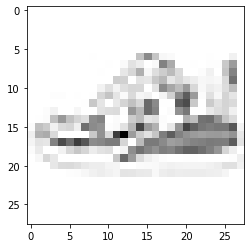

Prediction Sandal
Grand Truth Sneaker


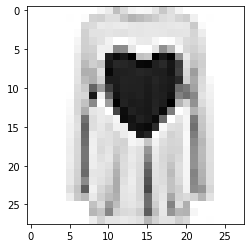

Prediction Dress
Grand Truth Pullover


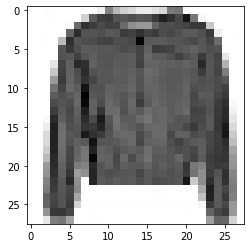

Prediction Pullover
Grand Truth Coat


641698

In [ ]:
## Searching for some images which have been predicted falsely
img_rows=28
img_cols=28

#so that the function outputs the cloth type rather than the number
def switch(argument):
    switcher = {
        0:'T-shirt/top',
        1:'Trouser',
        2:'Pullover',
        3:'Dress',
        4:'Coat',
        5:'Sandal',
        6:'Shirt',
        7:'Sneaker',
        8:'Bag',
        9:'Ankle boot'
    }
    return switcher.get(argument)
    
for i in range(100): # Prediction on 100 test data points
    image_index = np.random.randint(10000)
    pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
    if pred.argmax() != y_test[image_index]: #show if prediction is not correct
        plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
        plt.show()
        #print('Prediction',pred.argmax())
        #print('Grand Truth',y_test[image_index])
        print('Prediction: ', switch(pred.argmax()))
        print('Grand Truth: ',switch(y_test[image_index]))



model.count_params()

## Exercise 2:

The goal here is to learn the function $f(x)=x^2$ and
$g(x)=0.25(sin(2 \pi x^2)+2.0)$ on $[0,1]$ using neural networks
whose characteristics will be specified below. For illustration purposes
we here plot the functions.


Take as training data uniformly sampled data on $[0,1]$ of size $100$.
-   Implement a simple neural network with one hidden layer with activation function relu and a linear readout map. Learn the parameters using a mean square error loss and compare the learned map with the true function.
-   How many nodes do you have to choose such that it works? Does it work at all? Do you observe a different behavior for the two functions?
-   Try with more training data and also with a deep neural network. Does it work better?

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

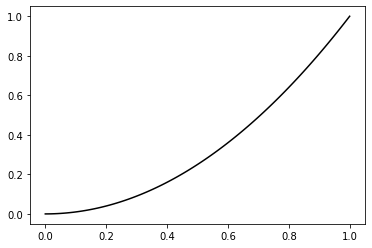

In [9]:
def func_square(x):
        resultsquare = (x)**2
        return (resultsquare)

# Densely spaced points for generating the ideal functional curve
x_min = 0 # Min of the range of x (feature)
x_max = 1 # Max of the range of x (feature)
x = np.array(np.linspace(x_min,x_max,100))

y = func_square(x)
plt.plot(x,y,'k') # Plotting x^2


In [10]:
#reshaping an array to have 1 entry per row
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42)

In [50]:
# First, we create a simple neural network
# That means, we use only one hidden layer

x_train = np.random.uniform(0, 1, 100)
y_train = func_square(x_train)

# Here, we will use 100 nodes in this hidden layer

model = Sequential()

model.add(Dense(100, input_dim=1, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam')
# training the model
model.fit(x_train, y_train, epochs=100)

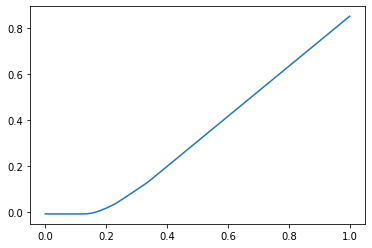

In [52]:
y_learnt = model.predict(x)

plt.plot(x,y_learnt, "o")

In [ ]:
# So this works really bad
# After some trial and error, we can see that we must either increase the 
# length of x_train to 1000 or the nodes to a value of 1000:

model = Sequential()
model.add(Dense(1000, input_dim=1, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# training the model
model.fit(x_train, y_train, epochs=100)
y_learnt = model.predict(x)

4/4 [==============================] - 0s 3ms/step - loss: 0.1702
Test result: [loss, accuracy]= 0.17020420730113983


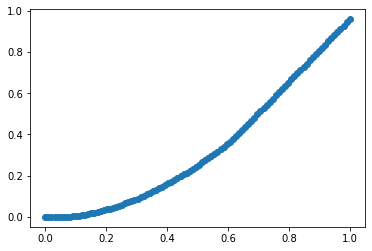

In [67]:
plt.plot(x,y_learnt, "o")
t = model.evaluate(y_learnt, y_train)
print('Test result: [loss, accuracy]=',t)

In [59]:
# This looks a bit better, but using deep neural networks, we can solve this
# using less nodes. Here, we used 202 nodes:
# one node in the input layer, hundred nodes for each of the two hidden layers 
# and one node in the output layer

model = Sequential()

model.add(Dense(100, input_dim=1, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1))

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               200       
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=100)

4/4 [==============================] - 0s 2ms/step - loss: 0.1698
Test result: [loss, accuracy]= 0.16978749632835388


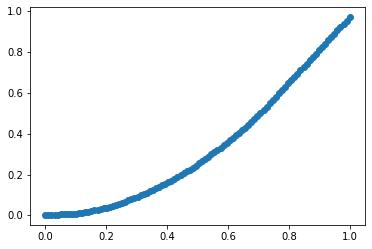

In [64]:
y_learnt = model.predict(x)
plt.plot(x,y_learnt, "o")
t = model.evaluate(y_learnt, y_train)
print('Test result: [loss, accuracy]=',t)

### Second graph

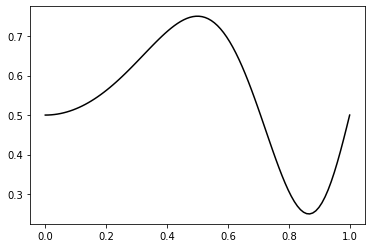

In [69]:
def func_sin(x):
        resultsin=0.25*(np.sin(2*np.pi*x*x)+2.0)
        return (resultsin)

# Densely spaced points for generating the ideal functional curve
x_min = 0 # Min of the range of x (feature)
x_max = 1 # Max of the range of x (feature)
x = np.array(np.linspace(x_min,x_max,100))

y = func_sin(x)
plt.plot(x,y,'k') # Plotting 0.25(\sin(2\pi x^2)+2.0)

In [84]:
x_train = np.random.uniform(0, 1, 1000)
y_train = func_sin(x_train)

In [ ]:
#Creating a sequential model and adding the values

model = Sequential()
model.add(Dense(1000, input_dim=1, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1))

# Loss function and optimisation algorithm
model.compile(loss='mse', optimizer='adam')
# Training
model.fit(x_train,y_train, epochs=100)

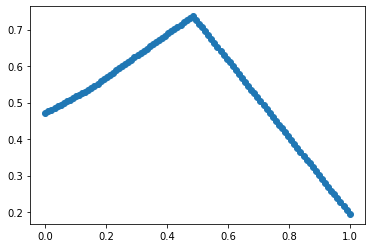

In [86]:
yhat = model.predict(x)
plt.plot(x,yhat,'o') # Plotting the second function

In [ ]:
# Again, this didn't go well, it seems this function is too complex for only 1000 nodes
# Let's try again with 100000 nodes

model = Sequential()
model.add(Dense(100000, input_dim=1, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1))

# Loss function and optimisation algorithm
model.compile(loss='mse', optimizer='adam')
# Training
model.fit(x_train,y_train, epochs=100)

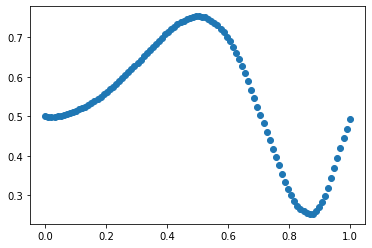

In [88]:
yhat = model.predict(x)
plt.plot(x,yhat,'o') # Plotting the second function

In [ ]:
# This worked much better
# Now let's try with a deep neural network
# This time we will use three layers of 1000 each

model = Sequential()
model.add(Dense(1000, input_dim=1, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1000, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1000, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(1))

# Loss function and optimisation algorithm
model.compile(loss='mse', optimizer='adam')
# Training
model.fit(x_train,y_train, epochs=100)

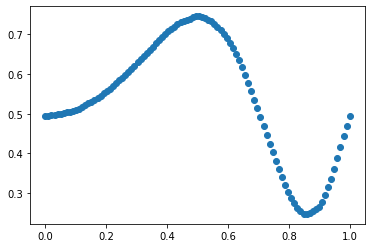

In [90]:
# The results are convincing
# The curve around x-values of 0.8 and 0.9 look slightly smoother
yhat = model.predict(x)
plt.plot(x,yhat,'o') # Plotting the second function